In [1]:
!pip install Tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

# Loading the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [23]:

 train_labels[0]


1

In [24]:
 len(train_labels)

25000

In [25]:
test_labels[0]

0

In [26]:
max_word_index = max([max(sequence) for sequence in test_data])
print("Maximum word index in test data:", max_word_index)

word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print("Decoded review:", decoded_review)


Maximum word index in test data: 9999
Decoded review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and s

In [27]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        for j in sequence:
            if j < dimension:
                results[i, j] = 1.

    return results


In [31]:
 #Data Vectorization
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (25000, 10000)
x_test shape: (25000, 10000)


In [29]:
# Label vectorization
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

# Inspecting the shape and data type of the labels
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")


y_train shape: (25000,), dtype: float32
y_test shape: (25000,), dtype: float32


In [32]:
from tensorflow import keras
from tensorflow.keras import layers

# Building the model
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),  # First hidden layer with ReLU activation
    layers.Dense(16, activation="relu"),  # Second hidden layer with ReLU activation
    layers.Dense(1, activation="sigmoid")  # Output layer with sigmoid activation for binary classification
])

# Compiling the model
model.compile(optimizer="rmsprop",  # Optimizer
              loss="binary_crossentropy",  # Loss function for binary classification
              metrics=["accuracy"])  # Performance metric

# Displaying the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Creating a validation set
x_val = x_train[:10000]  # First 10,000 samples for validation
partial_x_train = x_train[10000:]  # Remaining samples for training

y_val = y_train[:10000]  # First 10,000 labels for validation
partial_y_train = y_train[10000:]  # Remaining labels for training

# Display the shapes to ensure proper split
print(f"x_val shape: {x_val.shape}")
print(f"partial_x_train shape: {partial_x_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"partial_y_train shape: {partial_y_train.shape}")


x_val shape: (10000, 10000)
partial_x_train shape: (15000, 10000)
y_val shape: (10000,)
partial_y_train shape: (15000,)


In [34]:
# Training the model
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,               # Number of epochs
                    batch_size=512,          # Size of mini-batches
                    validation_data=(x_val, y_val))  # Validation data


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.6851 - loss: 0.6180 - val_accuracy: 0.8643 - val_loss: 0.4287
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8878 - loss: 0.3705 - val_accuracy: 0.8848 - val_loss: 0.3301
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9166 - loss: 0.2646 - val_accuracy: 0.8877 - val_loss: 0.2934
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9357 - loss: 0.2067 - val_accuracy: 0.8833 - val_loss: 0.2898
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9467 - loss: 0.1717 - val_accuracy: 0.8883 - val_loss: 0.2797
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9584 - loss: 0.1408 - val_accuracy: 0.8776 - val_loss: 0.3078
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9620 - loss: 0.1269 - val_accuracy: 0.8860 - val_loss: 0.2916
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9703 - loss: 0.1053 - val_accuracy: 0.8847 - 

In [36]:
# The model.fit() method produces a History object
history_dict = history.history  # Accessing the history varaiable

# Displaying the keys in the history dictionary
print(history_dict.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


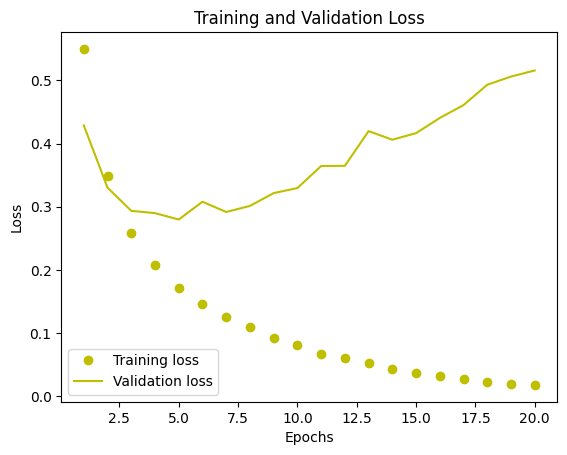

In [38]:
import matplotlib.pyplot as plt

# Accessing the history of the training process
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# Creating a range of epochs
epochs = range(1, len(loss_values) + 1)

# Plotting the training and validation loss
plt.plot(epochs, loss_values, "yo", label="Training loss")  # Green dots for training loss
plt.plot(epochs, val_loss_values, "y", label="Validation loss")  # Green line for validation loss
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


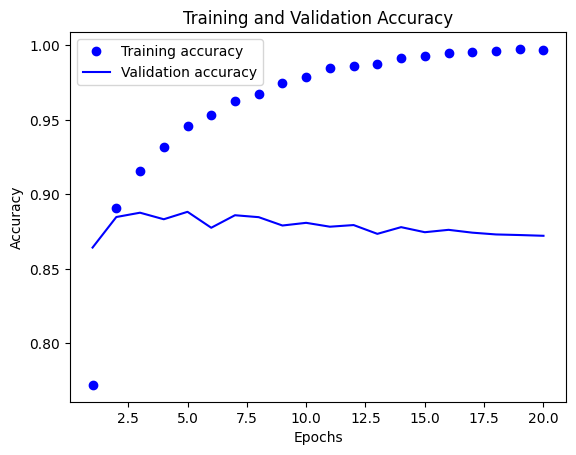

In [41]:
plt.clf()  # Clear the current figure

# Accessing accuracy data from the history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

# Plotting accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")  # Green dots for training accuracy
plt.plot(epochs, val_acc, "b", label="Validation accuracy")  # Green line for validation accuracy
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
# Model retraining from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Training the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluating the model on test data
results = model.evaluate(x_test, y_test)

# Displaying the results
print(results)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7580 - loss: 0.5448
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8995 - loss: 0.2876
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9256 - loss: 0.2135
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9368 - loss: 0.1779
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8821 - loss: 0.2892
[0.2889229357242584, 0.8839600086212158]


In [43]:
# Using a trained model to make predictions about new data
predictions = model.predict(x_test)

# Displaying the predictions
print(predictions)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[0.1804077 ]
 [0.99986655]
 [0.6691917 ]
 ...
 [0.09840262]
 [0.06601784]
 [0.5433581 ]]


In [44]:
# Additional Experiments

# Constructing a neural network with a single hidden layer
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),  # You can change to "tanh" for the activation function
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_1_layer.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",  # You can change to "mean_squared_error" for MSE
                      metrics=["accuracy"])

# Setting aside a validation set
x_val1 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val1 = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history1_layer = model_1_layer.fit(partial_x_train,
                                    partial_y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_val1, y_val1))

# Displaying training history
print(history1_layer.history)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7123 - loss: 0.5900 - val_accuracy: 0.8650 - val_loss: 0.4051
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8896 - loss: 0.3571 - val_accuracy: 0.8822 - val_loss: 0.3285
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9146 - loss: 0.2713 - val_accuracy: 0.8870 - val_loss: 0.2988
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9279 - loss: 0.2272 - val_accuracy: 0.8869 - val_loss: 0.2871
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9391 - loss: 0.1963 - val_accuracy: 0.8840 - val_loss: 0.2842
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9481 - loss: 0.1725 - val_accuracy: 0.8867 - val_loss: 0.2748
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9541 - loss: 0.1530 - val_accuracy: 0.8865 - val_loss: 0.2784
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9557 - loss: 0.1439 - val_accuracy: 0.8863 - v

In [45]:
# Accessing the training history
history_dict1 = history1_layer.history

# Displaying the keys in the history dictionary
print(history_dict1.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


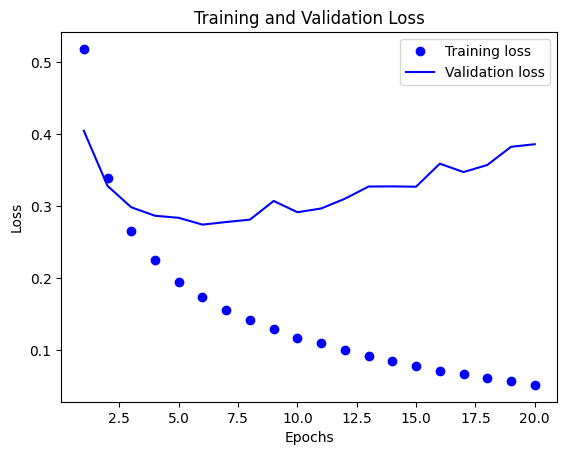

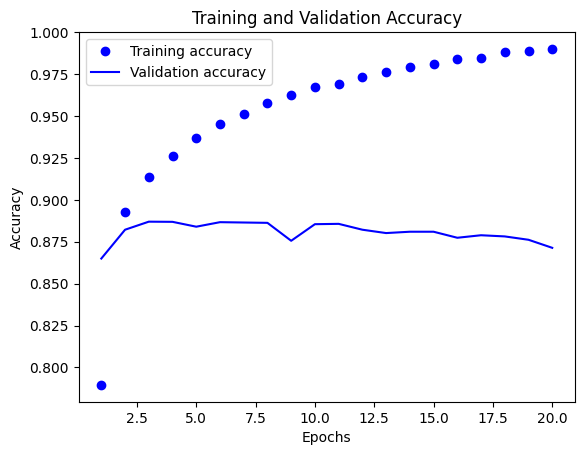

In [46]:
import matplotlib.pyplot as plt

# Accessing the training history
history_dict1 = history1_layer.history
loss_value1 = history_dict1["loss"]
val_loss_value1 = history_dict1["val_loss"]
epochs1 = range(1, len(loss_value1) + 1)

# Plotting graph of Training and Validation Loss
plt.plot(epochs1, loss_value1, "bo", label="Training loss")
plt.plot(epochs1, val_loss_value1, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting graph of Training and Validation Accuracy
plt.clf()  # Clear the current figure
accuracy1 = history_dict1["accuracy"]
val_accuracy1 = history_dict1["val_accuracy"]

plt.plot(epochs1, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs1, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [47]:
# Creating the model with one hidden layer
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),  # Change "relu" to "tanh" if you want to test that activation function
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_1_layer.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",  # Change to "mean_squared_error" if desired
                      metrics=["accuracy"])

# Training the model for 5 epochs
model_1_layer.fit(x_train, y_train, epochs=5, batch_size=512)

# Evaluating the model on the test data
result_1_layer = model_1_layer.evaluate(x_test, y_test)

# Printing the evaluation results
print("Test Loss:", result_1_layer[0])
print("Test Accuracy:", result_1_layer[1])


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7641 - loss: 0.5486
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8930 - loss: 0.3199
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9117 - loss: 0.2512
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9261 - loss: 0.2149
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9353 - loss: 0.1899
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8859 - loss: 0.2809
Test Loss: 0.28053224086761475
Test Accuracy: 0.8871999979019165


In [48]:
 print(result_1_layer)

[0.28053224086761475, 0.8871999979019165]


In [49]:
 model_1_layer.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.22529948],
       [0.9996671 ],
       [0.6561784 ],
       ...,
       [0.09481269],
       [0.08410431],
       [0.4901489 ]], dtype=float32)

In [50]:
# Building a neural network with 3 hidden layers
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_3_layers.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

# Creating a validation set
x_val3 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val3 = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history_3_layers = model_3_layers.fit(partial_x_train,
                                       partial_y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_val3, y_val3))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6752 - loss: 0.6109 - val_accuracy: 0.8654 - val_loss: 0.3936
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8994 - loss: 0.3248 - val_accuracy: 0.8719 - val_loss: 0.3187
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9258 - loss: 0.2250 - val_accuracy: 0.8751 - val_loss: 0.3032
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9427 - loss: 0.1773 - val_accuracy: 0.8847 - val_loss: 0.2910
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9498 - loss: 0.1525 - val_accuracy: 0.8855 - val_loss: 0.2846
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9610 - loss: 0.1216 - val_accuracy: 0.8833 - val_loss: 0.3011
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9644 - loss: 0.1123 - val_accuracy: 0.8831 - val_loss: 0.3179
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9776 - loss: 0.0828 - val_accuracy: 0.8792 - v

In [53]:
# Accessing the history of the training process
history_dict_3 = history_3_layers.history

# Displaying the keys in the history dictionary
print(history_dict_3.keys())  # Should output: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


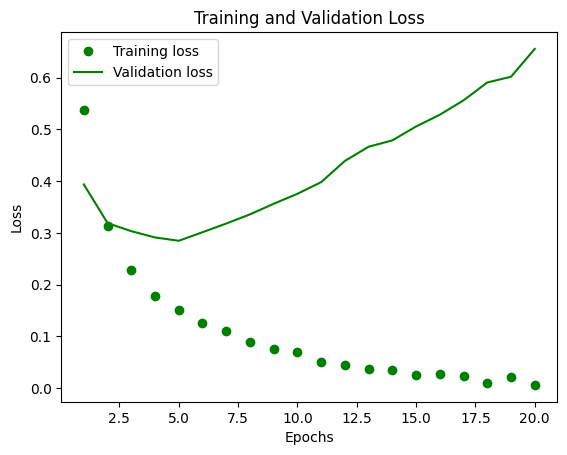

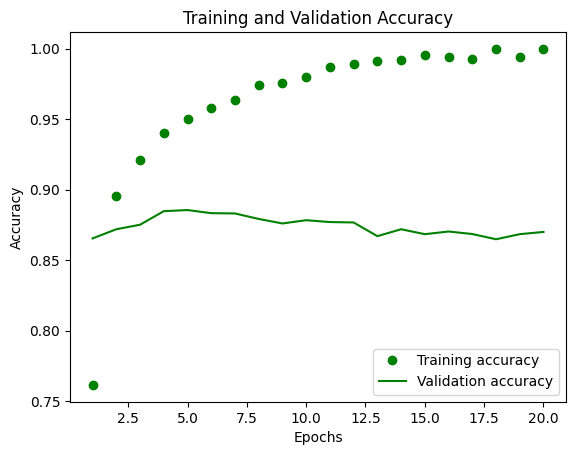

In [56]:
import matplotlib.pyplot as plt

# Extracting loss values
loss_val3 = history_dict_3["loss"]
val_loss_val3 = history_dict_3["val_loss"]
epochs3 = range(1, len(loss_val3) + 1)

# Plotting Training and Validation Loss
plt.plot(epochs3, loss_val3, "go", label="Training loss")
plt.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Clear figure for the next plot
plt.clf()

# Extracting accuracy values
accuracy3 = history_dict_3["accuracy"]
val_accuracy3 = history_dict_3["val_accuracy"]

# Plotting Training and Validation Accuracy
plt.plot(epochs3, accuracy3, "go", label="Training accuracy")
plt.plot(epochs3, val_accuracy3, "g", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [57]:
from tensorflow import keras
from tensorflow.keras import layers

# Building a neural network with 3 hidden layers
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_3_layers.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Fitting the model
model_3_layers.fit(x_train, y_train, epochs=3, batch_size=512)

# Evaluating the model
results_3_layers = model_3_layers.evaluate(x_test, y_test)
print(results_3_layers)  # Optionally print the evaluation results


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6912 - loss: 0.6047
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8997 - loss: 0.3099
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9203 - loss: 0.2208
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8854 - loss: 0.2821
[0.28105953335762024, 0.8881999850273132]


In [58]:
 model_3_layers.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.27610105],
       [0.99986523],
       [0.9086928 ],
       ...,
       [0.15393107],
       [0.13369925],
       [0.5507346 ]], dtype=float32)

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

# Building a neural network with 3 hidden layers, each with 32 units
model_32_units = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_32_units.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

# Creating a validation set
x_val_32 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_32 = y_train[:10000]
partial_y_train = y_train[10000:]

# Fitting the model
history_32_units = model_32_units.fit(partial_x_train,
                                       partial_y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_val_32, y_val_32))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6480 - loss: 0.6392 - val_accuracy: 0.8382 - val_loss: 0.4196
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8782 - loss: 0.3417 - val_accuracy: 0.8825 - val_loss: 0.3017
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9088 - loss: 0.2469 - val_accuracy: 0.8853 - val_loss: 0.2824
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9398 - loss: 0.1775 - val_accuracy: 0.8815 - val_loss: 0.2978
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9409 - loss: 0.1624 - val_accuracy: 0.8796 - val_loss: 0.3034
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9538 - loss: 0.1273 - val_accuracy: 0.8798 - val_loss: 0.3316
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9672 - loss: 0.1017 - val_accuracy: 0.8646 - val_loss: 0.3995
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9754 - loss: 0.0805 - val_accuracy: 0.8810 - v

In [61]:
# Accessing the history dictionary
history_dict_32 = history_32_units.history

# Displaying the keys in the history dictionary
print(history_dict_32.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


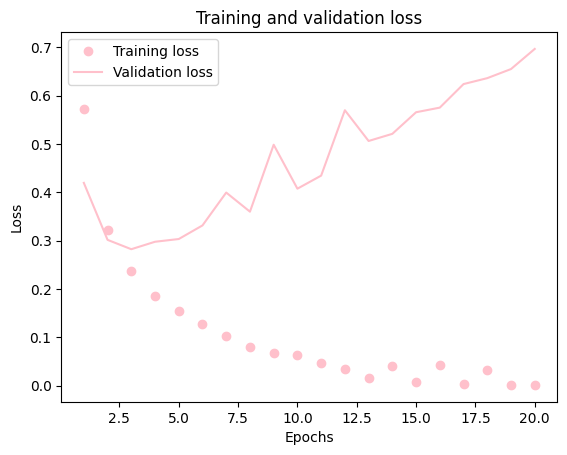

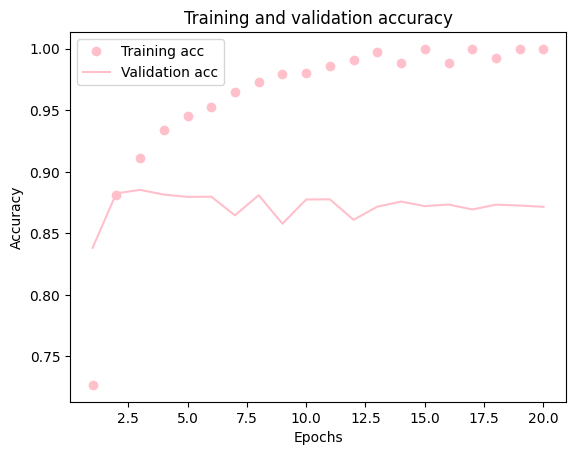

In [63]:
# Plotting Training and Validation Loss
plt.plot(epochs_32, loss_value_32, "o", color="pink", label="Training loss")
plt.plot(epochs_32, val_loss_value_32, color="pink", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # clear figure

# Plotting Training and Validation Accuracy
plt.plot(epochs_32, accuracy_32, "o", color="pink", label="Training acc")
plt.plot(epochs_32, val_accuracy_32, color="pink", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [64]:
# Training the model for 3 epochs
history_32_units = model_32_units.fit(x_train, y_train, epochs=3, batch_size=512)

# Evaluating the model on the test data
results_32_units = model_32_units.evaluate(x_test, y_test)

# Display the evaluation results
print(results_32_units)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9354 - loss: 0.2635
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9647 - loss: 0.1157
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9778 - loss: 0.0736
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8552 - loss: 0.4656
[0.45348644256591797, 0.8598399758338928]


In [67]:
# Creating a model with 64 units and 2 layers
model_64_units = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_64_units.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

# Preparing the validation set
x_val_64 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_64 = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history_64 = model_64_units.fit(partial_x_train,
                                 partial_y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_val_64, y_val_64))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6896 - loss: 0.5853 - val_accuracy: 0.8746 - val_loss: 0.3468
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8959 - loss: 0.2953 - val_accuracy: 0.8597 - val_loss: 0.3335
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9152 - loss: 0.2285 - val_accuracy: 0.8816 - val_loss: 0.2937
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9398 - loss: 0.1706 - val_accuracy: 0.8489 - val_loss: 0.3915
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9475 - loss: 0.1480 - val_accuracy: 0.8849 - val_loss: 0.2915
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9621 - loss: 0.1115 - val_accuracy: 0.8831 - val_loss: 0.3076
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9690 - loss: 0.0902 - val_accuracy: 0.8807 - val_loss: 0.3539
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9764 - loss: 0.0766 - val_accuracy: 0.8828 - v

In [68]:
# Creating a model with 64 units and 2 layers
model_64_units = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_64_units.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

# Preparing the validation set
x_val_64 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_64 = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history_64 = model_64_units.fit(partial_x_train,
                                 partial_y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_val_64, y_val_64))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6688 - loss: 0.5965 - val_accuracy: 0.8091 - val_loss: 0.4321
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8685 - loss: 0.3316 - val_accuracy: 0.8873 - val_loss: 0.2889
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9166 - loss: 0.2336 - val_accuracy: 0.8850 - val_loss: 0.2819
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9402 - loss: 0.1713 - val_accuracy: 0.8745 - val_loss: 0.3116
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9526 - loss: 0.1407 - val_accuracy: 0.8740 - val_loss: 0.3282
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9513 - loss: 0.1316 - val_accuracy: 0.8823 - val_loss: 0.3239
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9646 - loss: 0.1074 - val_accuracy: 0.8386 - val_loss: 0.4820
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9672 - loss: 0.0954 - val_accuracy: 0.8822 - 

In [71]:
history_dict_64 = history_64.history  # Accessing the history attribute
history_dict_64.keys()  # Displaying the keys in the history dictionary


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

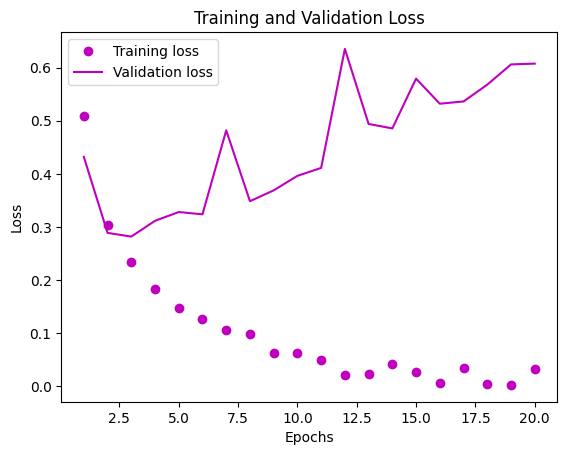

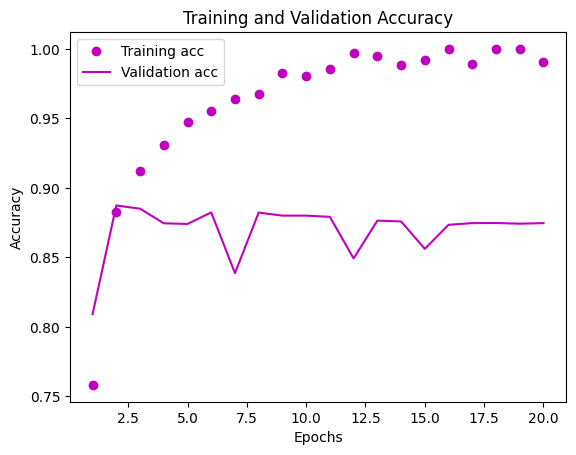

In [73]:
# Plotting Training and Validation Loss
plt.plot(epochs_64, loss_value64, "mo", label="Training loss")
plt.plot(epochs_64, val_loss_value64, "m", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clear figure

# Plotting Training and Validation Accuracy
accuracy_64 = history_dict_64["accuracy"]
val_accuracy_64 = history_dict_64["val_accuracy"]
plt.plot(epochs_64, accuracy_64, "mo", label="Training acc")
plt.plot(epochs_64, val_accuracy_64, "m", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [74]:
# Training the model with 64 units and 2 layers for 3 epochs
history_64 = model_64_units.fit(x_train, y_train, epochs=3, batch_size=512)

# Evaluating the model on the test set
results_64_units = model_64_units.evaluate(x_test, y_test)

# Displaying the results
print(results_64_units)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9506 - loss: 0.1939
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9725 - loss: 0.0907
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9852 - loss: 0.0541
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8544 - loss: 0.4769
[0.4677376449108124, 0.8573200106620789]


In [75]:
results_64_units = model_64_units.evaluate(x_test, y_test)
print(f"validation set accuracy = {results_64_units[1] * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8544 - loss: 0.4769
validation set accuracy = 85.73%


In [76]:
# Training the model with 128 units & 3 layers
model_128units = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Model compilation
model_128units.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

# Validation
x_val_128 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_128 = y_train[:10000]
partial_y_train = y_train[10000:]

# Model training
history_128 = model_128units.fit(partial_x_train,
                                   partial_y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_val_128, y_val_128))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6196 - loss: 0.6289 - val_accuracy: 0.8661 - val_loss: 0.3534
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8731 - loss: 0.3268 - val_accuracy: 0.8415 - val_loss: 0.3753
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9001 - loss: 0.2502 - val_accuracy: 0.8884 - val_loss: 0.2721
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9428 - loss: 0.1647 - val_accuracy: 0.8867 - val_loss: 0.2813
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9495 - loss: 0.1341 - val_accuracy: 0.8839 - val_loss: 0.3077
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.9620 - loss: 0.1016 - val_accuracy: 0.8802 - val_loss: 0.2874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9852 - loss: 0.0599 - val_accuracy: 0.8819 - val_loss: 0.3464
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9895 - loss: 0.0389 - val_accuracy: 0.8807 

In [77]:
# Accessing the history attribute
history_dict_128 = history_128.history

# Displaying the keys in the history dictionary
print(history_dict_128.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


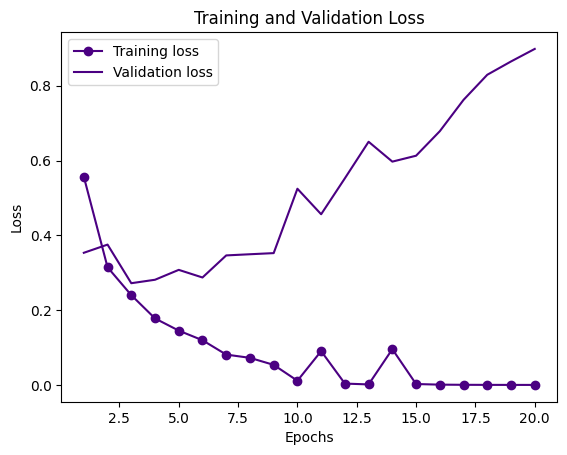

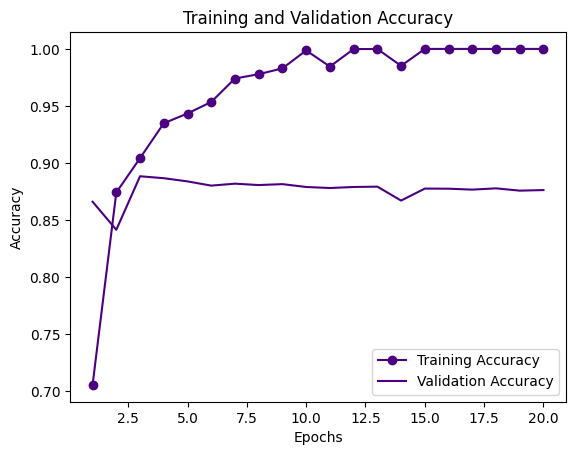

In [78]:
# Accessing the history attribute
history_dict_128 = history_128.history

# Displaying the keys in the history dictionary
print(history_dict_128.keys())

# Loss values
loss_value_128 = history_dict_128["loss"]
val_loss_value_128 = history_dict_128["val_loss"]
epochs_128 = range(1, len(loss_value_128) + 1)

# Plotting Training and Validation Loss
plt.plot(epochs_128, loss_value_128, "o-", color="indigo", label="Training loss")
plt.plot(epochs_128, val_loss_value_128, "-", color="indigo", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Clear figure for the next plot
plt.clf()

# Accuracy values
accuracy_128 = history_dict_128["accuracy"]
val_accuracy_128 = history_dict_128["val_accuracy"]

# Plotting Training and Validation Accuracy
plt.plot(epochs_128, accuracy_128, "o-", color="indigo", label="Training Accuracy")
plt.plot(epochs_128, val_accuracy_128, "-", color="indigo", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [79]:
# Training the model with 128 units for 2 epochs
history_128 = model_128units.fit(x_train, y_train, epochs=2, batch_size=512)

# Evaluating the model on the test set
results_128_units = model_128units.evaluate(x_test, y_test)

# Displaying the results
print("Test Loss:", results_128_units[0])
print("Test Accuracy:", results_128_units[1])


Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9335 - loss: 0.2759
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9750 - loss: 0.0796
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8598 - loss: 0.4079
Test Loss: 0.4096068739891052
Test Accuracy: 0.8600800037384033


In [80]:
 model_128units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.00621479],
       [0.9999982 ],
       [0.07146824],
       ...,
       [0.00402893],
       [0.002307  ],
       [0.45465413]], dtype=float32)

In [81]:
# MSE loss function model with 16 units
MSE_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilation of the model
MSE_model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

# Validation of the model
x_val_MSE = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_MSE = y_train[:10000]
partial_y_train = y_train[10000:]

# Model Fit
history_MSE = MSE_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val_MSE, y_val_MSE))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6522 - loss: 0.2240 - val_accuracy: 0.8358 - val_loss: 0.1398
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8690 - loss: 0.1160 - val_accuracy: 0.8705 - val_loss: 0.1034
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9129 - loss: 0.0779 - val_accuracy: 0.8818 - val_loss: 0.0897
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9329 - loss: 0.0593 - val_accuracy: 0.8865 - val_loss: 0.0861
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9423 - loss: 0.0516 - val_accuracy: 0.8887 - val_loss: 0.0838
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9550 - loss: 0.0419 - val_accuracy: 0.8881 - val_loss: 0.0841
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9604 - loss: 0.0361 - val_accuracy: 0.8857 - val_loss: 0.0850
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9692 - loss: 0.0310 - val_accuracy: 0.8643 - v

In [82]:
# Accessing the history attribute
history_dict_MSE = history_MSE.history

# Displaying the keys in the history dictionary
print(history_dict_MSE.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


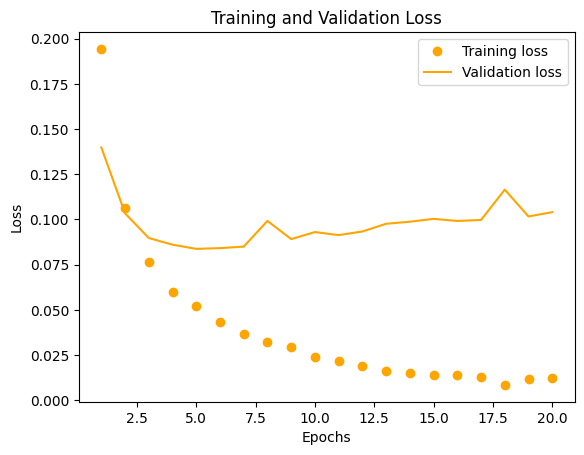

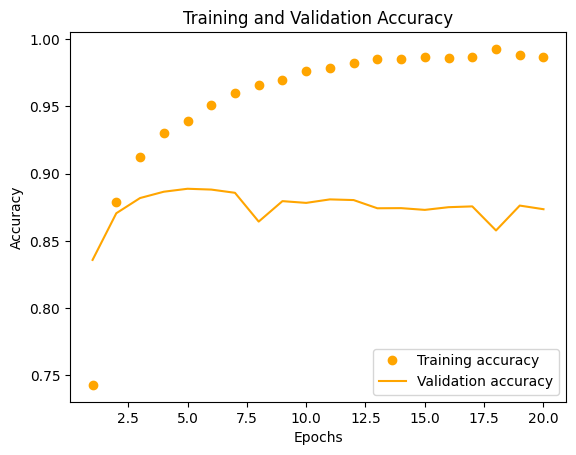

In [83]:
import matplotlib.pyplot as plt

# Accessing loss values
loss_value_MSE = history_dict_MSE["loss"]
val_loss_value_MSE = history_dict_MSE["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE) + 1)

# Plotting Training and Validation Loss
plt.plot(epochs_MSE, loss_value_MSE, "o", label="Training loss", color="orange")
plt.plot(epochs_MSE, val_loss_value_MSE, label="Validation loss", color="orange")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clear the figure

# Accessing accuracy values
acc_MSE = history_dict_MSE["accuracy"]
val_acc_MSE = history_dict_MSE["val_accuracy"]

# Plotting Training and Validation Accuracy
plt.plot(epochs_MSE, acc_MSE, "o", label="Training accuracy", color="orange")
plt.plot(epochs_MSE, val_acc_MSE, label="Validation accuracy", color="orange")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [84]:
# Fitting the model
history_MSE = MSE_model.fit(x_train, y_train, epochs=8, batch_size=512)

# Evaluating the model
results_MSE = MSE_model.evaluate(x_test, y_test)

# Displaying the results
print(results_MSE)


Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9442 - loss: 0.0474
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9603 - loss: 0.0353
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9656 - loss: 0.0316
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9697 - loss: 0.0285
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9728 - loss: 0.0256
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9770 - loss: 0.0226
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9799 - loss: 0.0201
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9794 - loss: 0.0204
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8615 - loss: 0.1165
[0.11554127931594849, 0.862559974193573]


In [85]:
# Making predictions on the test set
predictions_MSE = MSE_model.predict(x_test)

# Displaying the predictions
print(predictions_MSE)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[0.02392174]
 [0.99999994]
 [0.97652423]
 ...
 [0.05024211]
 [0.01162545]
 [0.88961047]]


In [86]:
from tensorflow import keras
from tensorflow.keras import layers

# Creating the model with tanh activation
tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
tanh.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

# Splitting the validation set
x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]

# Fitting the model
historytanh_model = tanh.fit(partial_x_train, partial_y_train, epochs=20,
                              batch_size=512, validation_data=(x_val_tanh, y_val_tanh))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7022 - loss: 0.2002 - val_accuracy: 0.8316 - val_loss: 0.1370
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8878 - loss: 0.1097 - val_accuracy: 0.8820 - val_loss: 0.1027
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9110 - loss: 0.0848 - val_accuracy: 0.8739 - val_loss: 0.0990
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9247 - loss: 0.0708 - val_accuracy: 0.8808 - val_loss: 0.0912
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9347 - loss: 0.0610 - val_accuracy: 0.8876 - val_loss: 0.0864
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9454 - loss: 0.0532 - val_accuracy: 0.8729 - val_loss: 0.0934
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9511 - loss: 0.0492 - val_accuracy: 0.8767 - val_loss: 0.0894
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9563 - loss: 0.0438 - val_accuracy: 0.8857 - v

In [87]:
# Accessing the history attribute
historydict_tanh = historytanh_model.history

# Displaying the keys in the history dictionary
print(historydict_tanh.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


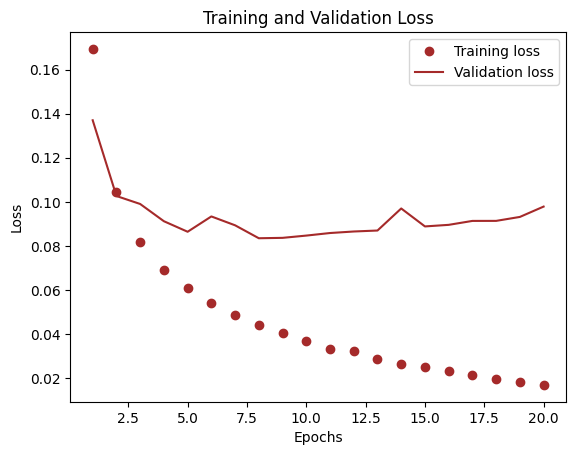

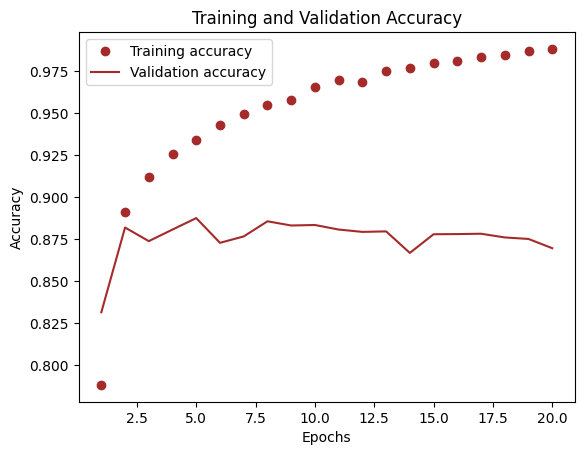

In [88]:
import matplotlib.pyplot as plt

# Loss Plot
loss_value_tanh = historydict_tanh["loss"]
val_loss_value_tanh = historydict_tanh["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh) + 1)

plt.plot(epochs_tanh, loss_value_tanh, "o", color="brown", label="Training loss")
plt.plot(epochs_tanh, val_loss_value_tanh, color="brown", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clear the figure

# Accuracy Plot
acc_tanh = historydict_tanh["accuracy"]
val_acc_tanh = historydict_tanh["val_accuracy"]

plt.plot(epochs_tanh, acc_tanh, "o", color="brown", label="Training accuracy")
plt.plot(epochs_tanh, val_acc_tanh, color="brown", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [89]:
# Training the model with the tanh activation function
history_tanh = tanh.fit(x_train, y_train, epochs=8, batch_size=512)

# Evaluating the model on the test set
results_tanh = tanh.evaluate(x_test, y_test)

# Displaying the results
print(results_tanh)


Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9398 - loss: 0.0494
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9537 - loss: 0.0404
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9635 - loss: 0.0340
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9634 - loss: 0.0343
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9690 - loss: 0.0302
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9695 - loss: 0.0297
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9719 - loss: 0.0272
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9773 - loss: 0.0240
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8580 - loss: 0.1138
[0.11247191578149796, 0.8600800037384033]


In [90]:
# Creating the model with Adam optimizer
adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Splitting the data for validation
x_adam = x_train[:10000]
partial_x_train = x_train[10000:]
y_adam = y_train[:10000]
partial_y_train = y_train[10000:]

# Fitting the model
history_adam = adam.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_adam, y_adam))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.6860 - loss: 0.6402 - val_accuracy: 0.8580 - val_loss: 0.4299
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8964 - loss: 0.3494 - val_accuracy: 0.8848 - val_loss: 0.2931
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9282 - loss: 0.2054 - val_accuracy: 0.8877 - val_loss: 0.2821
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9588 - loss: 0.1323 - val_accuracy: 0.8864 - val_loss: 0.2997
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9759 - loss: 0.0907 - val_accuracy: 0.8818 - val_loss: 0.3370
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9864 - loss: 0.0617 - val_accuracy: 0.8773 - val_loss: 0.3821
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9934 - loss: 0.0373 - val_accuracy: 0.8755 - val_loss: 0.4384
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9973 - loss: 0.0236 - val_accuracy: 0.8732 - v

In [91]:
# Accessing the history attribute
historydict_adam = history_adam.history

# Displaying the keys in the history dictionary
print(historydict_adam.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


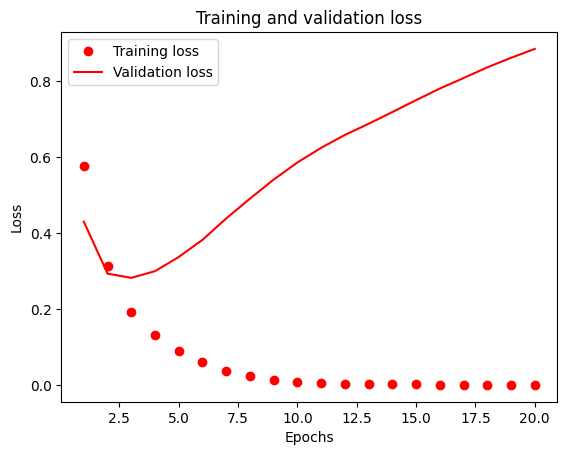

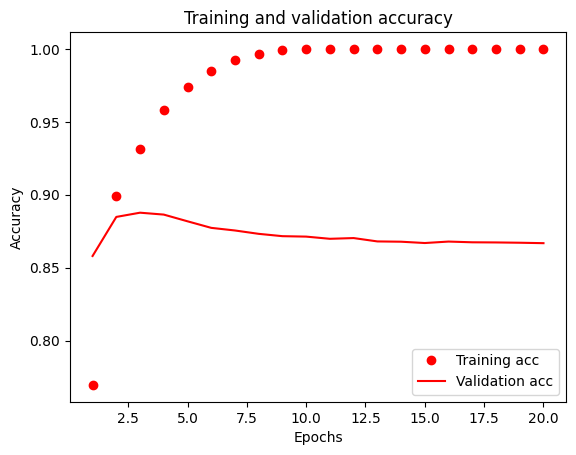

In [95]:
import matplotlib.pyplot as plt

# Extracting loss values
loss_value_adam = historydict_adam["loss"]
val_loss_value_adam = historydict_adam["val_loss"]
epochs_adam = range(1, len(loss_value_adam) + 1)

# Plotting training and validation loss
plt.plot(epochs_adam, loss_value_adam, "ro", label="Training loss")
plt.plot(epochs_adam, val_loss_value_adam, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clear figure

# Extracting accuracy values
acc_adam = historydict_adam["accuracy"]
val_acc_adam = historydict_adam["val_accuracy"]

# Plotting training and validation accuracy
plt.plot(epochs_adam, acc_adam, "ro", label="Training acc")
plt.plot(epochs_adam, val_acc_adam, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [96]:
# Fit the model
history_adam = adam.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the model
results_adam = adam.evaluate(x_test, y_test)

# Print the results
print(results_adam)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9409 - loss: 0.2911
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9634 - loss: 0.1225
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9815 - loss: 0.0705
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9894 - loss: 0.0469
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8552 - loss: 0.5587
[0.5565966963768005, 0.8554800152778625]


In [97]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Regularization model with 16 units and 2 layers
regularization = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
regularization.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Fit the model
history_regularization = regularization.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Access the history
historydict_regularization = history_regularization.history

# Display the keys in the history dictionary
print(historydict_regularization.keys())


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6928 - loss: 0.6532 - val_accuracy: 0.8661 - val_loss: 0.4506
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8931 - loss: 0.3948 - val_accuracy: 0.8520 - val_loss: 0.3995
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9147 - loss: 0.3076 - val_accuracy: 0.8587 - val_loss: 0.3780
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9283 - loss: 0.2639 - val_accuracy: 0.8830 - val_loss: 0.3406
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9444 - loss: 0.2272 - val_accuracy: 0.8829 - val_loss: 0.3379
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9501 - loss: 0.2083 - val_accuracy: 0.8816 - val_loss: 0.3442
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9549 - loss: 0.1986 - val_accuracy: 0.8839 - val_loss: 0.3416
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9621 - loss: 0.1851 - val_accuracy: 0.8822 - v

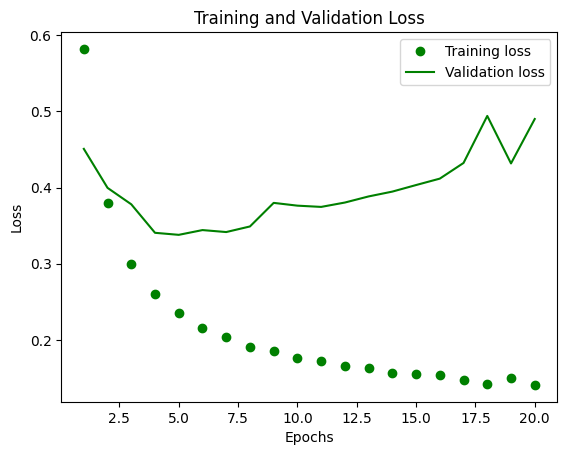

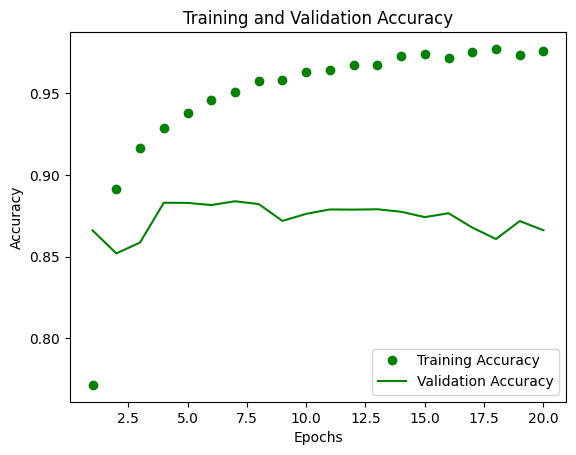

In [98]:
# Extract loss and accuracy values
loss_valu = historydict_regularization["loss"]
val_loss_value_r = historydict_regularization["val_loss"]
epochs_r = range(1, len(loss_valu) + 1)

# Plotting the training and validation loss
plt.plot(epochs_r, loss_valu, "go", label="Training loss")  # Green points for training loss
plt.plot(epochs_r, val_loss_value_r, "g", label="Validation loss")  # Green line for validation loss
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clear figure

# Extract accuracy values
acc_r = historydict_regularization["accuracy"]
val_acc_r = historydict_regularization["val_accuracy"]

# Plotting the training and validation accuracy
plt.plot(epochs_r, acc_r, "go", label="Training Accuracy")  # Green points for training accuracy
plt.plot(epochs_r, val_acc_r, "g", label="Validation Accuracy")  # Green line for validation accuracy
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [99]:
# Fitting the model with regularization
history_regularization = regularization.fit(x_train, y_train, epochs=8, batch_size=512)

# Evaluating the model on the test set
results_regularization = regularization.evaluate(x_test, y_test)

# Displaying the results
print(results_regularization)


Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9351 - loss: 0.2584
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9442 - loss: 0.2129
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9534 - loss: 0.1947
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9500 - loss: 0.1941
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9535 - loss: 0.1861
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9581 - loss: 0.1763
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9561 - loss: 0.1764
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9673 - loss: 0.1629
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8637 - loss: 0.4258
[0.41893473267555237, 0.8691999912261963]


In [100]:
from tensorflow.keras import regularizers

# Defining the model with Dropout layers
Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
Dropout.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Fitting the model
history_Dropout = Dropout.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Accessing the history attribute
historydict_Dropout = history_Dropout.history

# Displaying the keys in the history dictionary
print(historydict_Dropout.keys())


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5119 - loss: 0.6893 - val_accuracy: 0.7728 - val_loss: 0.6252
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6236 - loss: 0.6364 - val_accuracy: 0.8471 - val_loss: 0.5278
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6970 - loss: 0.5678 - val_accuracy: 0.8665 - val_loss: 0.4512
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7455 - loss: 0.5072 - val_accuracy: 0.8715 - val_loss: 0.3656
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7888 - loss: 0.4440 - val_accuracy: 0.8871 - val_loss: 0.3117
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8159 - loss: 0.4033 - val_accuracy: 0.8894 - val_loss: 0.2849
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8445 - loss: 0.3593 - val_accuracy: 0.8820 - val_loss: 0.2908
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8674 - loss: 0.3222 - val_accuracy: 0.8879 - v

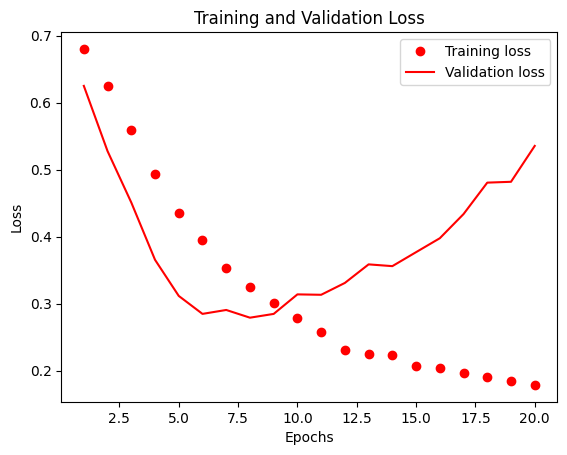

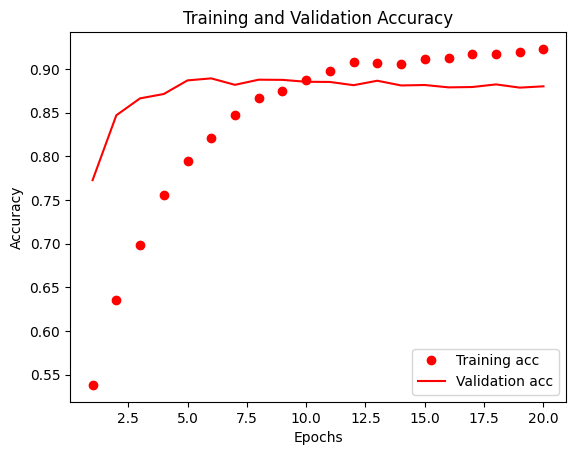

In [101]:
# Extracting loss values
loss_val = historydict_Dropout["loss"]
val_loss_val_d = historydict_Dropout["val_loss"]
epochs_d = range(1, len(loss_val) + 1)

# Plotting the training and validation loss
plt.plot(epochs_d, loss_val, "ro", label="Training loss")  # Red points for training loss
plt.plot(epochs_d, val_loss_val_d, "r-", label="Validation loss")  # Red line for validation loss
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clear the figure

# Extracting accuracy values
acc_d = historydict_Dropout["accuracy"]
val_acc_d = historydict_Dropout["val_accuracy"]

# Plotting the training and validation accuracy
plt.plot(epochs_d, acc_d, "ro", label="Training acc")  # Red points for training accuracy
plt.plot(epochs_d, val_acc_d, "r-", label="Validation acc")  # Red line for validation accuracy
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [102]:
# Fitting the Dropout model
history_Dropout = Dropout.fit(x_train, y_train, epochs=8, batch_size=512)

# Evaluating the model
results_Dropout = Dropout.evaluate(x_test, y_test)

# Displaying the results
print(results_Dropout)


Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8754 - loss: 0.3505
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8850 - loss: 0.2896
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8956 - loss: 0.2647
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8966 - loss: 0.2515
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8961 - loss: 0.2384
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9029 - loss: 0.2343
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9016 - loss: 0.2284
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9110 - loss: 0.2221
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8714 - loss: 0.4693
[0.4607551693916321, 0.8731200098991394]


In [103]:
from tensorflow.keras import regularizers

# Building the model
Hyper = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
Hyper.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

# Fitting the model
history_Hyper = Hyper.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Accessing the history attribute
history_dictHyper = history_Hyper.history

# Displaying the keys in the history dictionary
print(history_dictHyper.keys())


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5553 - loss: 0.2555 - val_accuracy: 0.8059 - val_loss: 0.1899
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7284 - loss: 0.2013 - val_accuracy: 0.8614 - val_loss: 0.1316
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8163 - loss: 0.1537 - val_accuracy: 0.8707 - val_loss: 0.1081
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8604 - loss: 0.1253 - val_accuracy: 0.8802 - val_loss: 0.1012
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8892 - loss: 0.1019 - val_accuracy: 0.8832 - val_loss: 0.0985
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9030 - loss: 0.0903 - val_accuracy: 0.8533 - val_loss: 0.1238
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9173 - loss: 0.0811 - val_accuracy: 0.8833 - val_loss: 0.1020
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9269 - loss: 0.0732 - val_accuracy: 0.8819 - v

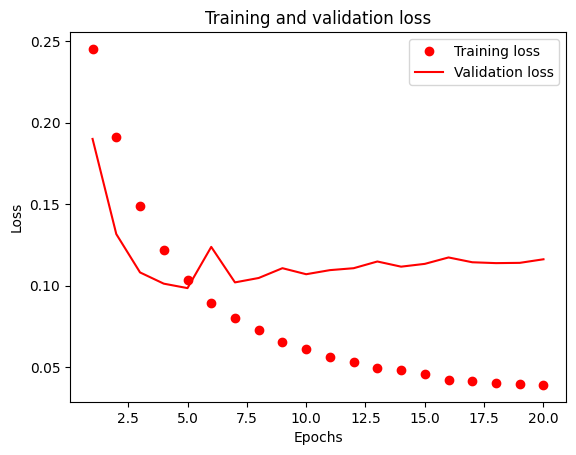

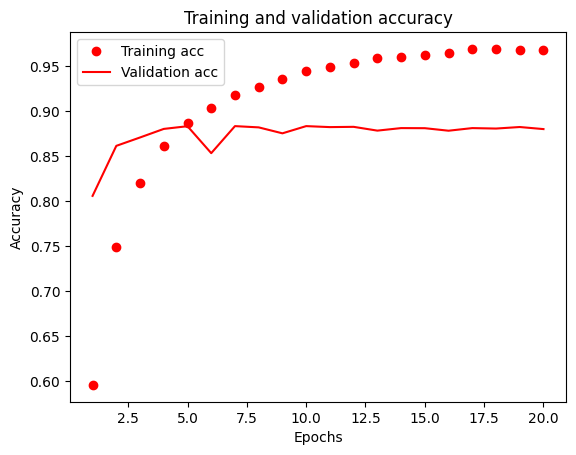

In [104]:
# Extracting the loss values
loss_va_h = history_dictHyper["loss"]
val_loss_va_h = history_dictHyper["val_loss"]
epochs_h = range(1, len(loss_va_h) + 1)

# Plotting the training and validation loss
plt.plot(epochs_h, loss_va_h, "ro", label="Training loss")  # Red points
plt.plot(epochs_h, val_loss_va_h, "r-", label="Validation loss")  # Red line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clear figure

# Extracting the accuracy values
acc_h = history_dictHyper["accuracy"]
val_acc_h = history_dictHyper["val_accuracy"]

# Plotting the training and validation accuracy
plt.plot(epochs_h, acc_h, "ro", label="Training acc")  # Red points
plt.plot(epochs_h, val_acc_h, "r-", label="Validation acc")  # Red line
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [107]:
# Fit the Hyper model
history_Hyper = Hyper.fit(x_train, y_train, epochs=8, batch_size=512)

# Evaluate the model on the test set
results_Hyper = Hyper.evaluate(x_test, y_test)

# Display results
results_Hyper


Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9287 - loss: 0.0729
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9337 - loss: 0.0680
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9422 - loss: 0.0613
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9478 - loss: 0.0566
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9485 - loss: 0.0553
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9515 - loss: 0.0534
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9547 - loss: 0.0515
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9553 - loss: 0.0498
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8770 - loss: 0.1164


[0.11318805813789368, 0.8815199732780457]

<Figure size 640x480 with 0 Axes>

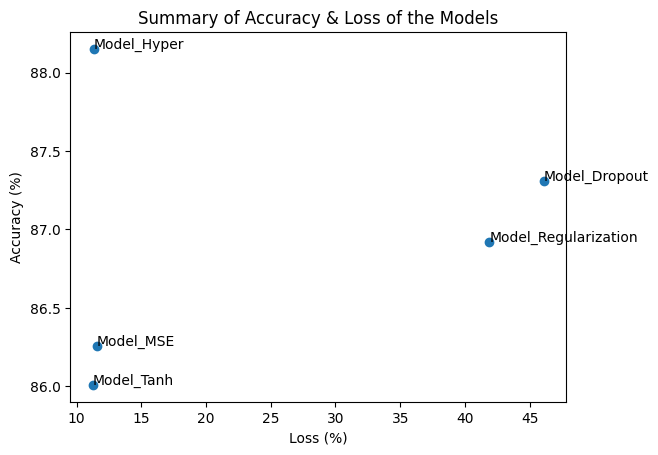

In [109]:
# Calculate loss and accuracy
Models_Loss = np.array([
    results_Dropout[0],
    results_Hyper[0],
    results_MSE[0],
    results_regularization[0],
    results_tanh[0]
]) * 100

Models_Accuracy = np.array([
    results_Dropout[1],
    results_Hyper[1],
    results_MSE[1],
    results_regularization[1],
    results_tanh[1]
]) * 100

Labels = ['Model_Dropout', 'Model_Hyper', 'Model_MSE', 'Model_Regularization', 'Model_Tanh']

plt.clf()
fig, ax = plt.subplots()

# Create scatter plot
ax.scatter(Models_Loss, Models_Accuracy)

# Annotate points with labels
for i, txt in enumerate(Labels):
    ax.annotate(txt, (Models_Loss[i], Models_Accuracy[i]))

# Set titles and labels
plt.title("Summary of Accuracy & Loss of the Models")
plt.ylabel("Accuracy (%)")
plt.xlabel("Loss (%)")
plt.show()


Summary:
After importing the data and processing the data, we made a neural network model with seventeen units including eight units as the number one hidden layer. Then we attempted to investigate how changing the number of hidden layers impacted performance of the model by setting about thirty two or sixty four units respectively on them.


conclusion:There were different patterns of sensitivity and loss across neural network models with varying configurations. Particularly, a noticeable performance increase was demonstrated by Model_Hyper. Generally, the performance of the models was greatly improved by the inclusion of dropout regularization whereby Model_Hyper was found to be the most effective setup. This means that regularization plays a vital role in optimizing model accuracy because it checks against overfitting and improves on generalization.